# Modelo regressão linear - Previsão de Co2

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.2
matplotlib: 3.4.3
plotly    : 5.5.0
pandas    : 1.3.4
numpy     : 1.20.3
watermark : 2.3.0



In [4]:
# Configuração para os gráficos largura e layout dos graficos

from matplotlib import style 

sns.set_palette("Accent")
style.use('fivethirtyeight')
color = sns.color_palette()

In [5]:
# Carregando a base de dados

data = pd.read_csv("temps.csv")
data

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2019,12,27,Tues,42,42,45.2,47,47
344,2019,12,28,Wed,42,47,45.3,48,58
345,2019,12,29,Thurs,47,48,45.3,48,65
346,2019,12,30,Fri,48,48,45.4,57,42


In [6]:
# Exibido 5 primeiros dados

data.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [7]:
# Exibido 5 últimos dados 

data.tail()

,year,month,day,week,temp_2,temp_1,average,actual,friend
343,2019,12,27,Tues,42,42,45.2,47,47
344,2019,12,28,Wed,42,47,45.3,48,58
345,2019,12,29,Thurs,47,48,45.3,48,65
346,2019,12,30,Fri,48,48,45.4,57,42
347,2019,12,31,Sat,48,57,45.5,40,57


In [8]:
# Número de linhas e colunas

data.shape

(348, 9)

In [9]:
# Verificando informações das variaveis

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [10]:
# Exibido tipos de dados

data.dtypes

year         int64
month        int64
day          int64
week        object
temp_2       int64
temp_1       int64
average    float64
actual       int64
friend       int64
dtype: object

In [11]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(data.shape[0]))
print("Números de colunas: {}" .format(data.shape[1]))

Números de linhas: 348
Números de colunas: 9


In [12]:
# Total de número duplicados

data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
343    False
344    False
345    False
346    False
347    False
Length: 348, dtype: bool

# Estatística descritiva

In [13]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,348.0,2019.000000,0.000000,2019.0,2019.000,2019.0,2019.000,2019.0
month,348.0,6.477011,3.498380,1.0,3.000,6.0,10.000,12.0
day,348.0,15.514368,8.772982,1.0,8.000,15.0,23.000,31.0
temp_2,348.0,62.652299,12.165398,35.0,54.000,62.5,71.000,117.0
temp_1,348.0,62.701149,12.120542,35.0,54.000,62.5,71.000,117.0
average,348.0,59.760632,10.527306,45.1,49.975,58.2,69.025,77.4
actual,348.0,62.543103,11.794146,35.0,54.000,62.5,71.000,92.0
friend,348.0,60.034483,15.626179,28.0,47.750,60.0,71.000,95.0


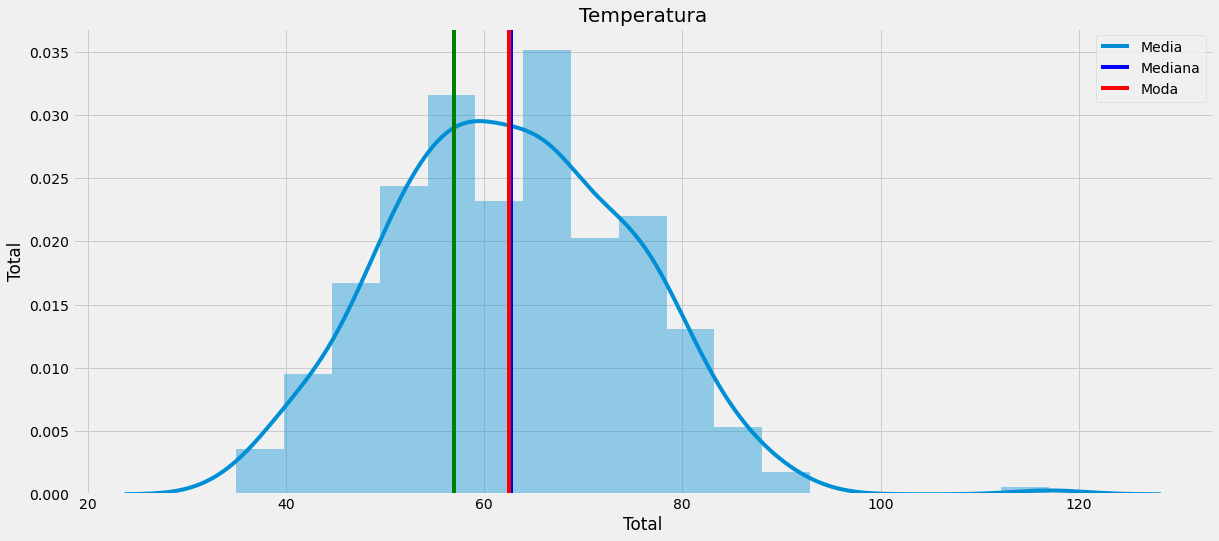

In [14]:
# Gráfico distribuição normal

plt.figure(figsize=(18.2, 8))

ax = sns.distplot(data['temp_1']);
plt.title("Temperatura", fontsize=20)
plt.xlabel("Total")
plt.ylabel("Total")
plt.axvline(data['temp_1'].mean(), color='b')
plt.axvline(data['temp_1'].median(), color='r')
plt.axvline(data['temp_1'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

In [15]:
# Média movel da temperatura

media_temp_1 = data[["year", "temp_1"]].groupby('year').mean()
media_temp_2 = data[["year", "temp_2"]].groupby('year').mean()

print("Média movel da temperatura 1", media_temp_1)
print()
print("Média movel da temperatura 2", media_temp_2)

Média movel da temperatura 1          temp_1
year           
2019  62.701149

Média movel da temperatura 2          temp_2
year           
2019  62.652299


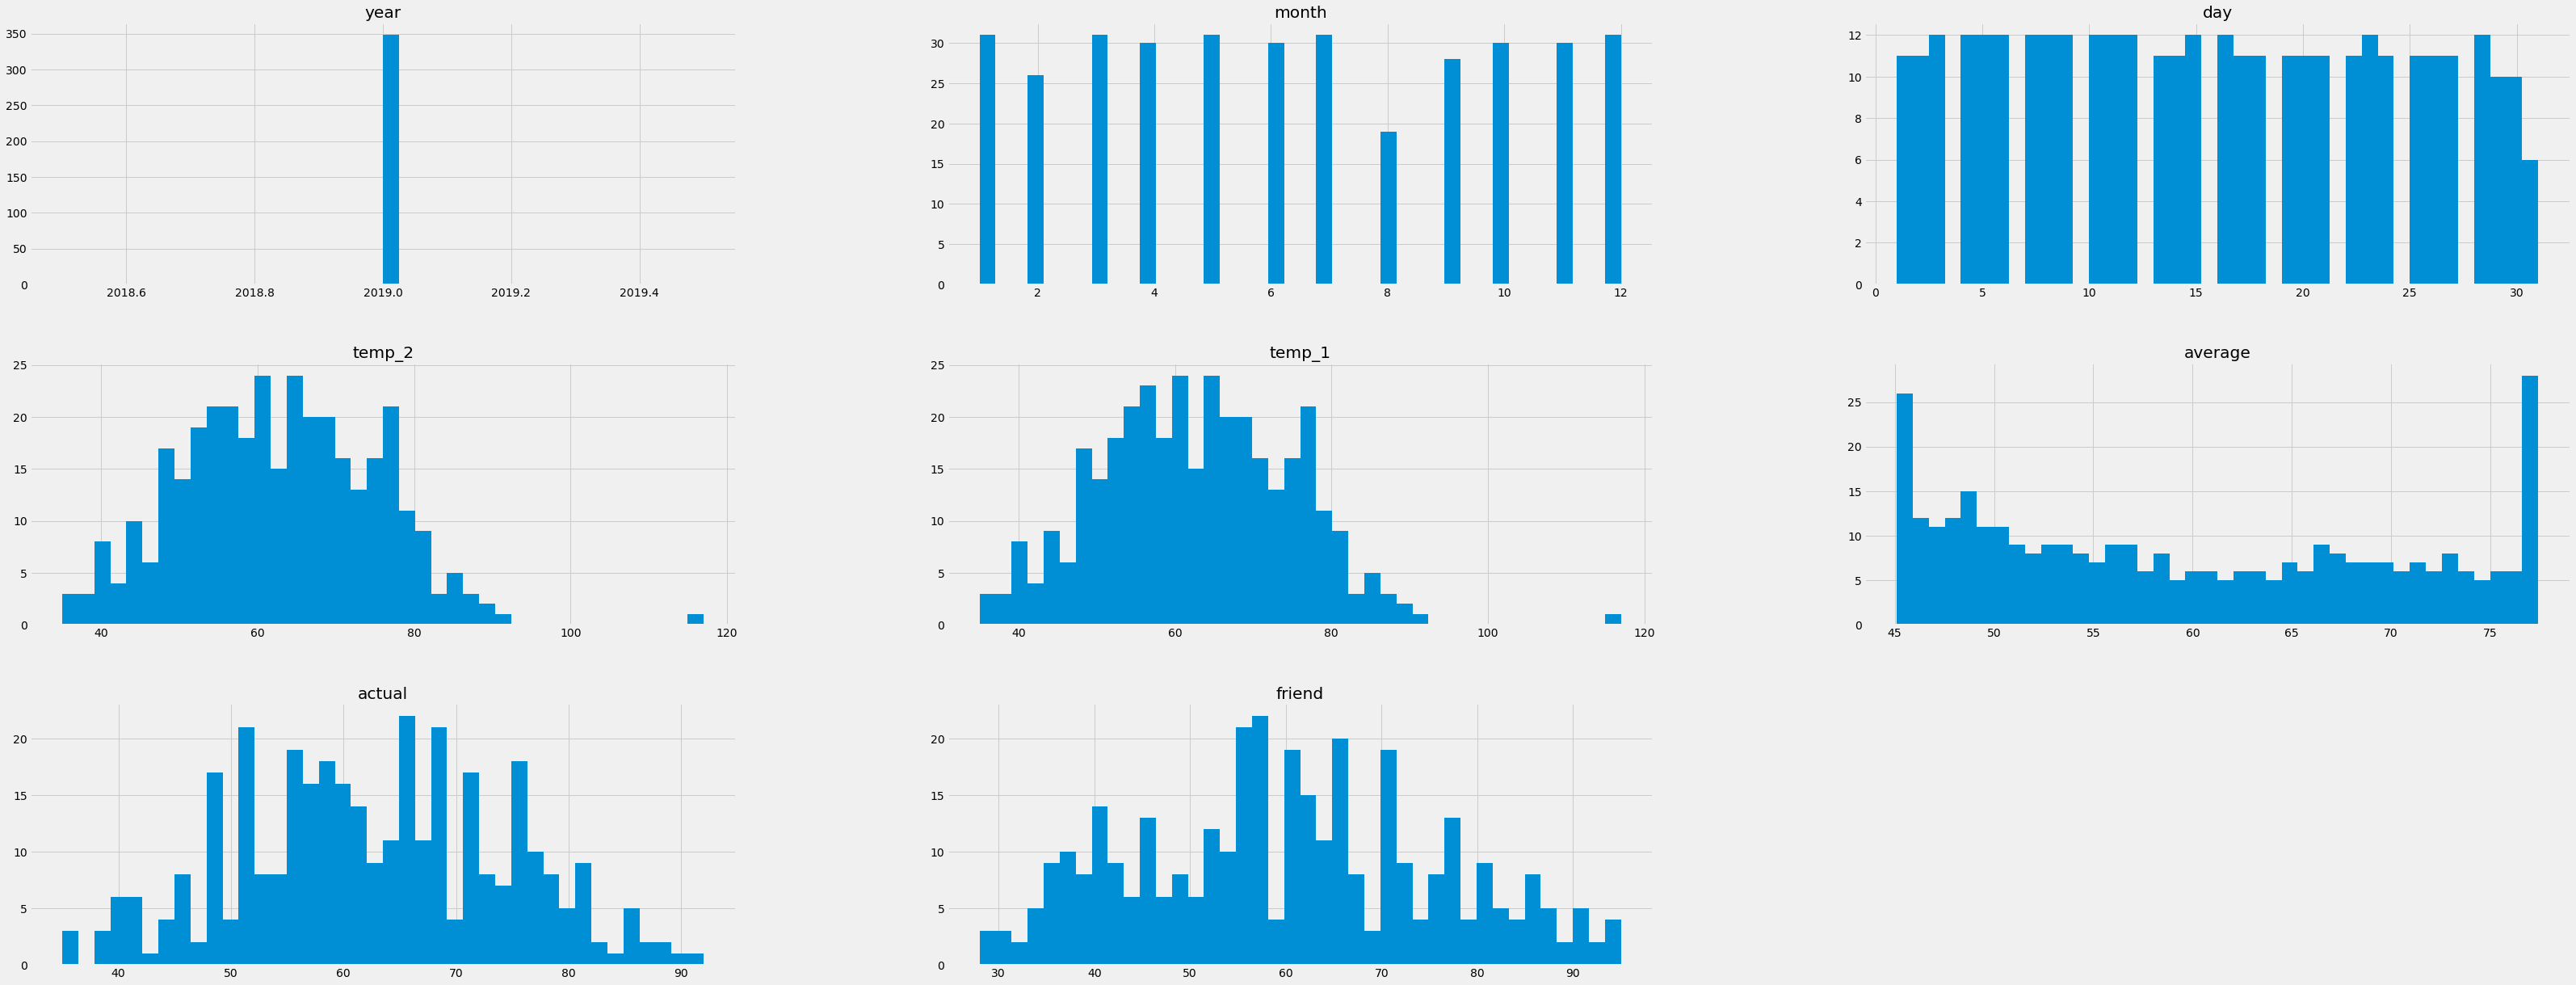

In [16]:
# Fazendo um comparativo dos dados 

data.hist(bins = 40, figsize=(50.2, 20))
plt.title("Gráfico de histograma")
plt.show()

# Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações. 

**Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não**  

- As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [17]:
# Importando a biblioteca para pré-processamento 

from sklearn.preprocessing import LabelEncoder

for i in data.columns:
    if data[i].dtype==np.number:
        continue
    data[i]= LabelEncoder().fit_transform(data[i])
    
data.head(4)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,0,0,0,0,8,8,45.6,8,1
1,0,0,1,2,7,8,45.7,7,32
2,0,0,2,3,8,7,45.8,4,27
3,0,0,3,1,7,4,45.9,3,24


# Treino e Teste

- Treino e teste da base de dados da coluna Internações

In [18]:
# One hot encoding
data = pd.get_dummies(data)
print('Shape One Hot Encoding:', data.shape)

Shape One Hot Encoding: (348, 9)


In [19]:
x = data.drop("actual", axis = 1) # Variável para treino
y = data["actual"] # Variável para teste

In [20]:
# Total de linhas e colunas dados variável x
x.shape

(348, 8)

In [21]:
# Total de linhas e colunas dados variável y
y.shape

(348,)

# Escalonamento

- Escalonamento uma forma de contornar os problemas relacionados à escala, mantendo a informação estatística dos dados. O procedimento consiste em realizar uma transformação sobre o conjunto original dos dados de modo que cada variável apresente média zero e variância unitária.

In [22]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler 

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(x) # Treinamento com a função fit_transform com a variável x
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[ 0.        , -1.5678393 , -1.65682171, ..., -1.49435913,
        -1.3470703 , -1.93356652],
       [ 0.        , -1.5678393 , -1.54267126, ..., -1.49435913,
        -1.33755752,  0.06215828],
       [ 0.        , -1.5678393 , -1.4285208 , ..., -1.57905571,
        -1.32804474, -0.25973282],
       ...,
       [ 0.        ,  1.5810006 ,  1.53939107, ..., -1.24026941,
        -1.37560866,  0.31967116],
       [ 0.        ,  1.5810006 ,  1.65354153, ..., -1.24026941,
        -1.36609587, -1.16102789],
       [ 0.        ,  1.5810006 ,  1.76769198, ..., -0.47800022,
        -1.35658309, -0.1953546 ]])

# Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [23]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, # Variável x
                                                    y, # Variável y
                                                    test_size=0.20, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [24]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(278, 8)

In [25]:
# Total de linhas dos dados de treino y

y_train.shape

(278,)

In [26]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(70, 8)

In [27]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(70,)

# Modelo machine learning 1 - Random Forest

In [28]:
%%time

from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(max_depth = 2, random_state = 0) # max_depth - determinando total de árvore, random_state 0
model_random_forest_fit = model_random_forest.fit(x_train, y_train) # Dados de treino, teste de x, y
model_random_forest_score = model_random_forest.score(x_train, y_train) # Valor da Accuracy do algoritmo 

print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 84.51
Wall time: 504 ms


In [29]:
# Previsão do modelo

model_random_forest_predict = model_random_forest.predict(x_test)
model_random_forest_predict

array([12.0920294 , 21.90563947, 27.7242017 , 17.89231457, 22.8594793 ,
       37.62248078, 38.2402772 , 27.90200657, 27.34096901, 30.43592306,
        7.38973169, 18.2148466 , 38.2402772 , 27.90200657, 26.82889968,
       27.90200657, 23.37661234, 12.22703985, 37.22645686, 37.1506245 ,
       30.43592306, 23.04637318, 17.47954303, 26.82889968, 38.01145401,
       15.46805149, 13.96683895, 35.62845624, 22.56481672, 38.2402772 ,
       18.44064662, 18.445645  , 22.46885227, 27.38993724, 22.35800706,
       26.71656367,  8.04056527, 34.12828428, 18.2148466 , 15.46805149,
       26.8908715 , 37.32699073, 23.37661234, 38.2402772 , 38.36035373,
       23.04637318, 23.04637318, 26.83318333, 37.32699073, 23.19905884,
       27.16413722, 12.22703985, 18.11888214,  8.04056527, 18.2148466 ,
       38.2402772 , 38.2402772 , 22.8594793 , 18.2148466 , 18.23234616,
       37.96071874, 33.92455818, 18.34468216, 22.8594793 , 27.90200657,
       37.60765575, 28.10573267, 38.15662763, 37.32699073, 22.45

In [30]:
print('R² = {}'.format(model_random_forest.score(x_train, y_train).round(2)))

R² = 0.85


In [31]:
pred_2 = model_random_forest.predict(x_train)
pred_2 = y_train - pred_2
pred_2

263   -0.795445
238    1.601005
302   -4.892315
21     4.531949
135   -9.732253
         ...   
323   -4.389732
192    1.988546
117    3.499218
47    -3.892315
172   -2.204117
Name: actual, Length: 278, dtype: float64

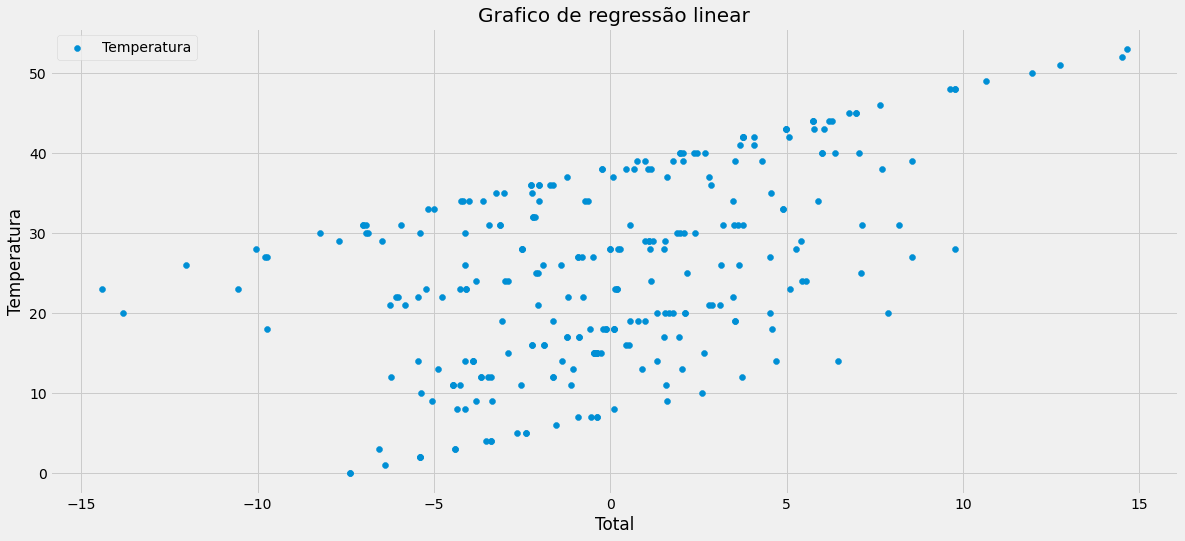

In [32]:
# Grafico de regressão linear

plt.figure(figsize=(18, 8))
plt.scatter(pred_2, y_train)
plt.title("Grafico de regressão linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Temperatura")
plt.legend(["Temperatura"])

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Internações', ylabel='Density'>

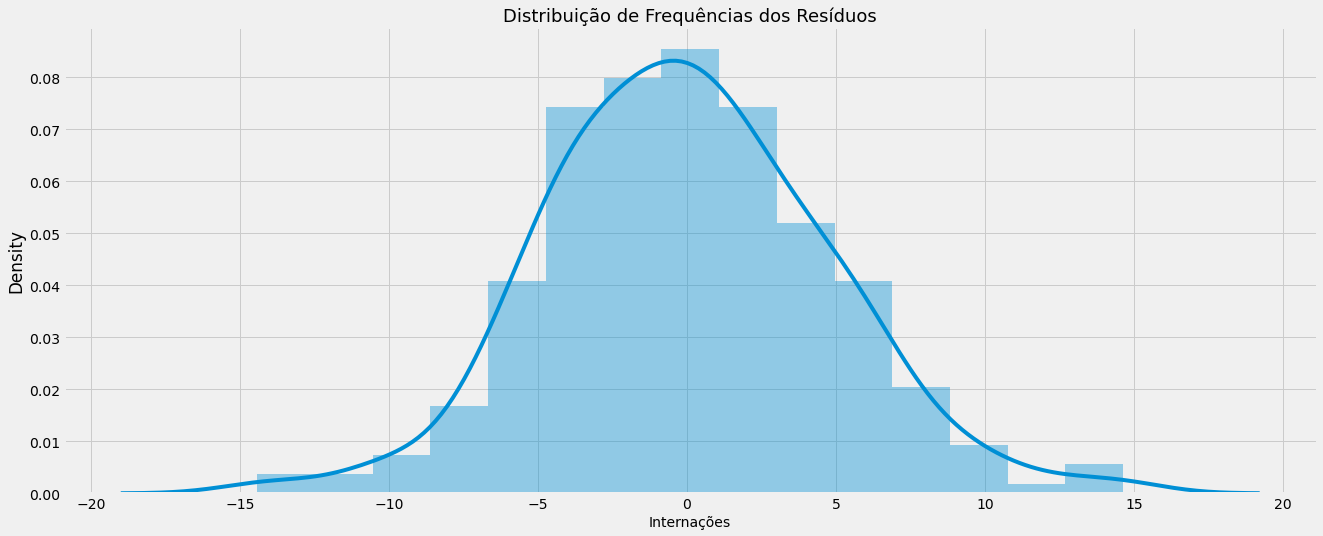

In [33]:
# Distribuição de Frequências dos Resíduos

ax = sns.distplot(pred_2)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Internações', fontsize=14)
ax

# Métricas para o modelo de regressão linear

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [35]:
# Importando bibliotecas verificações das métricas 

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, model_random_forest_predict))
mae = mean_absolute_error(y_test, model_random_forest_predict)
mape = mean_absolute_percentage_error(y_test, model_random_forest_predict)
mse = mean_squared_error(y_test, model_random_forest_predict)
r2 = r2_score(y_test, model_random_forest_predict)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

,Resultado
RMSE,4.880785
MAE,3.619472
MSE,23.822063
MAPE,0.218201
R²,0.797085


In [36]:
# Previsão de obitos

prev_2 = x_test[0:25]
model_pred_2 = model_random_forest.predict(prev_2)[0]
print("Previsão", model_pred_2)
prev_2

Previsão 12.092029402301446


,year,month,day,week,temp_2,temp_1,average,friend
6,0,0,6,4,7,14,46.2,9
52,0,1,23,6,14,23,50.8,17
269,0,9,12,4,25,29,60.6,28
45,0,1,16,6,18,19,50.0,17
294,0,10,7,5,24,26,52.7,20
189,0,6,10,1,34,37,75.3,42
191,0,6,12,6,37,40,75.6,27
116,0,3,28,0,24,27,61.2,20
90,0,3,2,3,34,26,56.3,35
249,0,8,22,0,31,30,68.3,32


# Modelo machine learning 2 - Regressão linear

In [37]:
# Modelo regressão linear - 2
# Importação da biblioteca sklearn o modelo regressão linear

from sklearn.linear_model import LinearRegression 

# Nome do algoritmo M.L
model_linear = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear.fit(x_train, y_train)

# Score do modelo
model_linear_score_1 = model_linear.score(x_train, y_train)

print("Modelo - Regressão linear: %.2f" % (model_linear_score_1 * 100))

Modelo - Regressão linear: 84.41


In [38]:
# Previsão do modelo

model_linear_pred = model_linear.predict(x_test)
model_linear_pred

array([14.59996935, 21.63452401, 27.42239561, 18.53955379, 22.24912888,
       38.44276681, 40.01457103, 27.70981837, 24.47932033, 31.17327885,
        7.35780095, 19.13141495, 43.64175896, 28.31429956, 22.7074937 ,
       28.4260312 , 24.13427592, 12.19116649, 37.59017119, 36.05454472,
       31.02875633, 21.82449916, 14.02595503, 24.0766243 , 35.74646032,
       18.23669899, 12.98191192, 29.43264646, 23.02387547, 40.13430978,
       17.27017184, 21.25782771, 22.42056616, 24.72656007, 21.60537126,
       23.74033227,  8.52431278, 31.77272568, 20.28330035, 15.81954044,
       23.82185089, 36.90595921, 22.00038085, 42.58622803, 47.54776594,
       23.38144151, 23.14771179, 22.72705802, 35.91760993, 24.35425882,
       26.31135032, 16.43452947, 18.07337641, 10.66818916, 18.21694371,
       41.59580622, 39.66416968, 23.71540316, 21.64035926, 18.40745782,
       36.38652177, 30.72877259, 19.74475338, 22.88021934, 30.13125299,
       41.83230499, 30.61923008, 41.50928596, 38.14004705, 21.73

In [39]:
# O intercepto representa o efeito médio em tendo todas as variáveis explicativas excluídas do modelo. 
# De forma mais simples, o intercepto representa o efeito médio em são iguais a zero.

model_linear.intercept_

-11.519042889130525

In [40]:
# Os coeficientes de regressão  𝛽2 ,  𝛽3  e  𝛽4  são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. 
# Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte

model_linear.coef_

array([ 0.        , -0.16999971,  0.00564923, -0.05349479, -0.04761512,
        0.63989568,  0.38172801,  0.00422536])

In [41]:
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. 
# É um valor entra 0 e 1.

print('R² = {}'.format(model_linear.score(x_train, y_train).round(2)))

R² = 0.84


In [42]:
# Previsão do modelo 
pred = model_linear.predict(x_train)
pred2 = y_train - pred
pred2

263    0.540961
238    2.992623
302   -3.485287
21     4.100443
135   -6.240083
         ...   
323   -4.193964
192    1.130349
117    5.255173
47    -2.916348
172   -1.233948
Name: actual, Length: 278, dtype: float64

# Gráfico de regressão linear

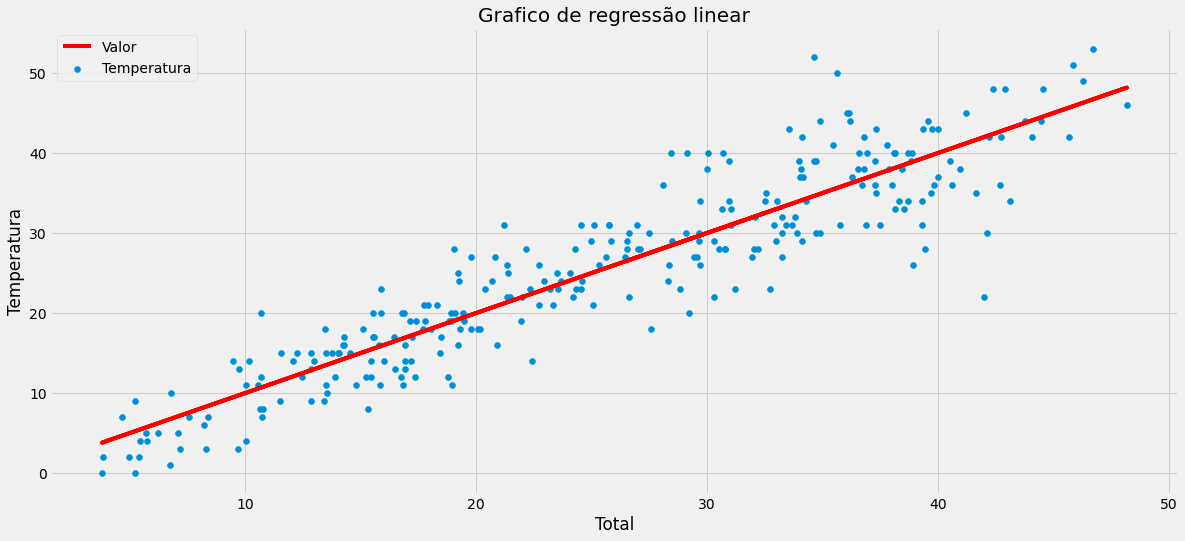

In [43]:
# Grafico de regressão linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, y_train)
plt.plot(pred, model_linear.predict(x_train), color = "red")
plt.title("Grafico de regressão linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Temperatura")
plt.legend(["Valor", "Temperatura"])

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Temperatura', ylabel='Density'>

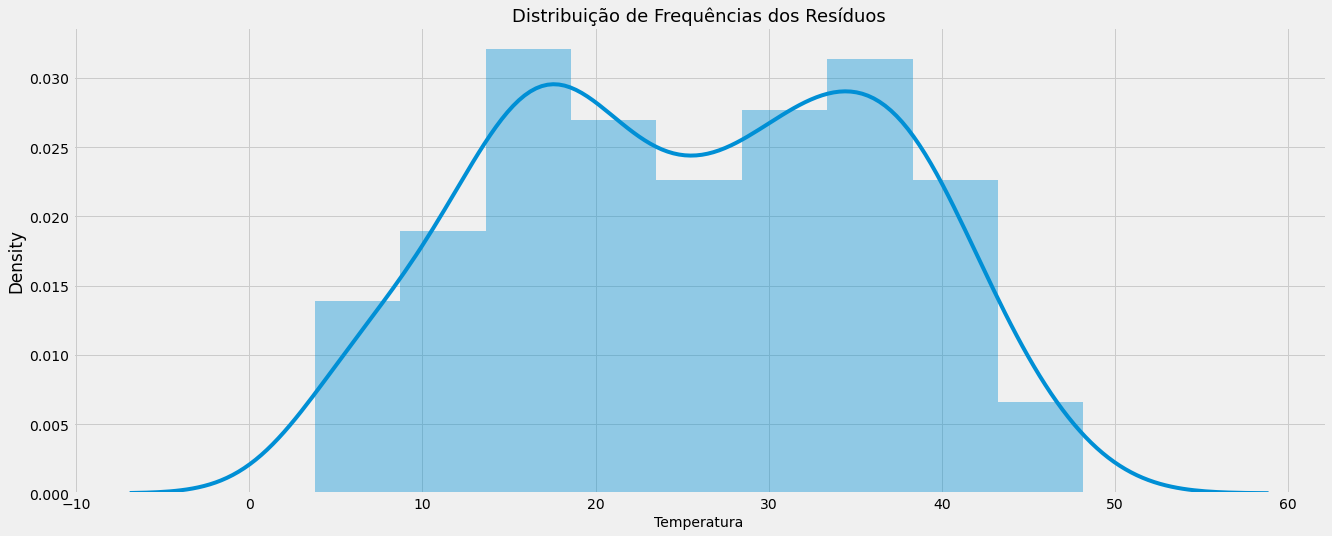

In [44]:
# Gráfico de distribuição Frequências

ax = sns.distplot(pred)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Temperatura', fontsize=14)
ax

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [45]:
# Importando bibliotecas verificações das métricas 

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred))
mae = mean_absolute_error(y_test, model_linear_pred)
mape = mean_absolute_percentage_error(y_test, model_linear_pred)
mse = mean_squared_error(y_test, model_linear_pred)
r2 = r2_score(y_test, model_linear_pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

,Resultado
RMSE,4.565247
MAE,3.372937
MSE,20.841477
MAPE,0.228975
R²,0.822473


In [46]:
# Previsão de internações

prev = x_test[0:25]
model_pred = model_linear.predict(prev)[0]
print("Previsão Temperatura", model_pred)
prev

Previsão Temperatura 14.599969351523072


,year,month,day,week,temp_2,temp_1,average,friend
6,0,0,6,4,7,14,46.2,9
52,0,1,23,6,14,23,50.8,17
269,0,9,12,4,25,29,60.6,28
45,0,1,16,6,18,19,50.0,17
294,0,10,7,5,24,26,52.7,20
189,0,6,10,1,34,37,75.3,42
191,0,6,12,6,37,40,75.6,27
116,0,3,28,0,24,27,61.2,20
90,0,3,2,3,34,26,56.3,35
249,0,8,22,0,31,30,68.3,32


# Modelo machine learning 3 - Decision Tree

In [47]:
%%time
from sklearn.tree import DecisionTreeRegressor

model_decision_tree = DecisionTreeRegressor(max_depth = 5, random_state = 0)
model_decision_tree_fit = model_decision_tree.fit(x_train, y_train)
model_decision_tree_score = model_decision_tree.score(x_train, y_train)

print("Modelo - Decision Tree Classifier: %.2f" % (model_decision_tree_score * 100))

Modelo - Decision Tree Classifier: 90.88
Wall time: 4.99 ms


In [48]:
# Previsão modelo

model_decision_tree_pred = model_decision_tree.predict(x_test)
model_decision_tree_pred

array([ 9.38888889, 19.        , 22.82352941, 17.04545455, 22.5       ,
       40.45454545, 37.75      , 25.        , 31.        , 29.33333333,
        4.66666667, 19.5       , 37.75      , 28.84615385, 31.        ,
       28.84615385, 28.84615385, 13.8       , 40.45454545, 34.4893617 ,
       29.33333333, 22.82352941, 19.5       , 22.82352941, 34.4893617 ,
       15.38461538,  9.38888889, 34.4893617 , 22.5       , 42.6875    ,
       19.5       , 19.        , 22.5       , 25.        , 22.5       ,
       22.82352941,  9.38888889, 34.4893617 , 17.04545455, 15.38461538,
       22.82352941, 34.4893617 , 28.84615385, 37.75      , 47.66666667,
       22.82352941, 22.82352941, 22.82352941, 34.4893617 , 22.82352941,
       28.84615385, 20.        , 19.        ,  9.38888889, 19.5       ,
       42.6875    , 37.75      , 27.25      , 19.        , 19.5       ,
       42.6875    , 34.4893617 , 22.5       , 27.25      , 28.84615385,
       47.66666667, 28.84615385, 47.66666667, 36.5       , 22.5 

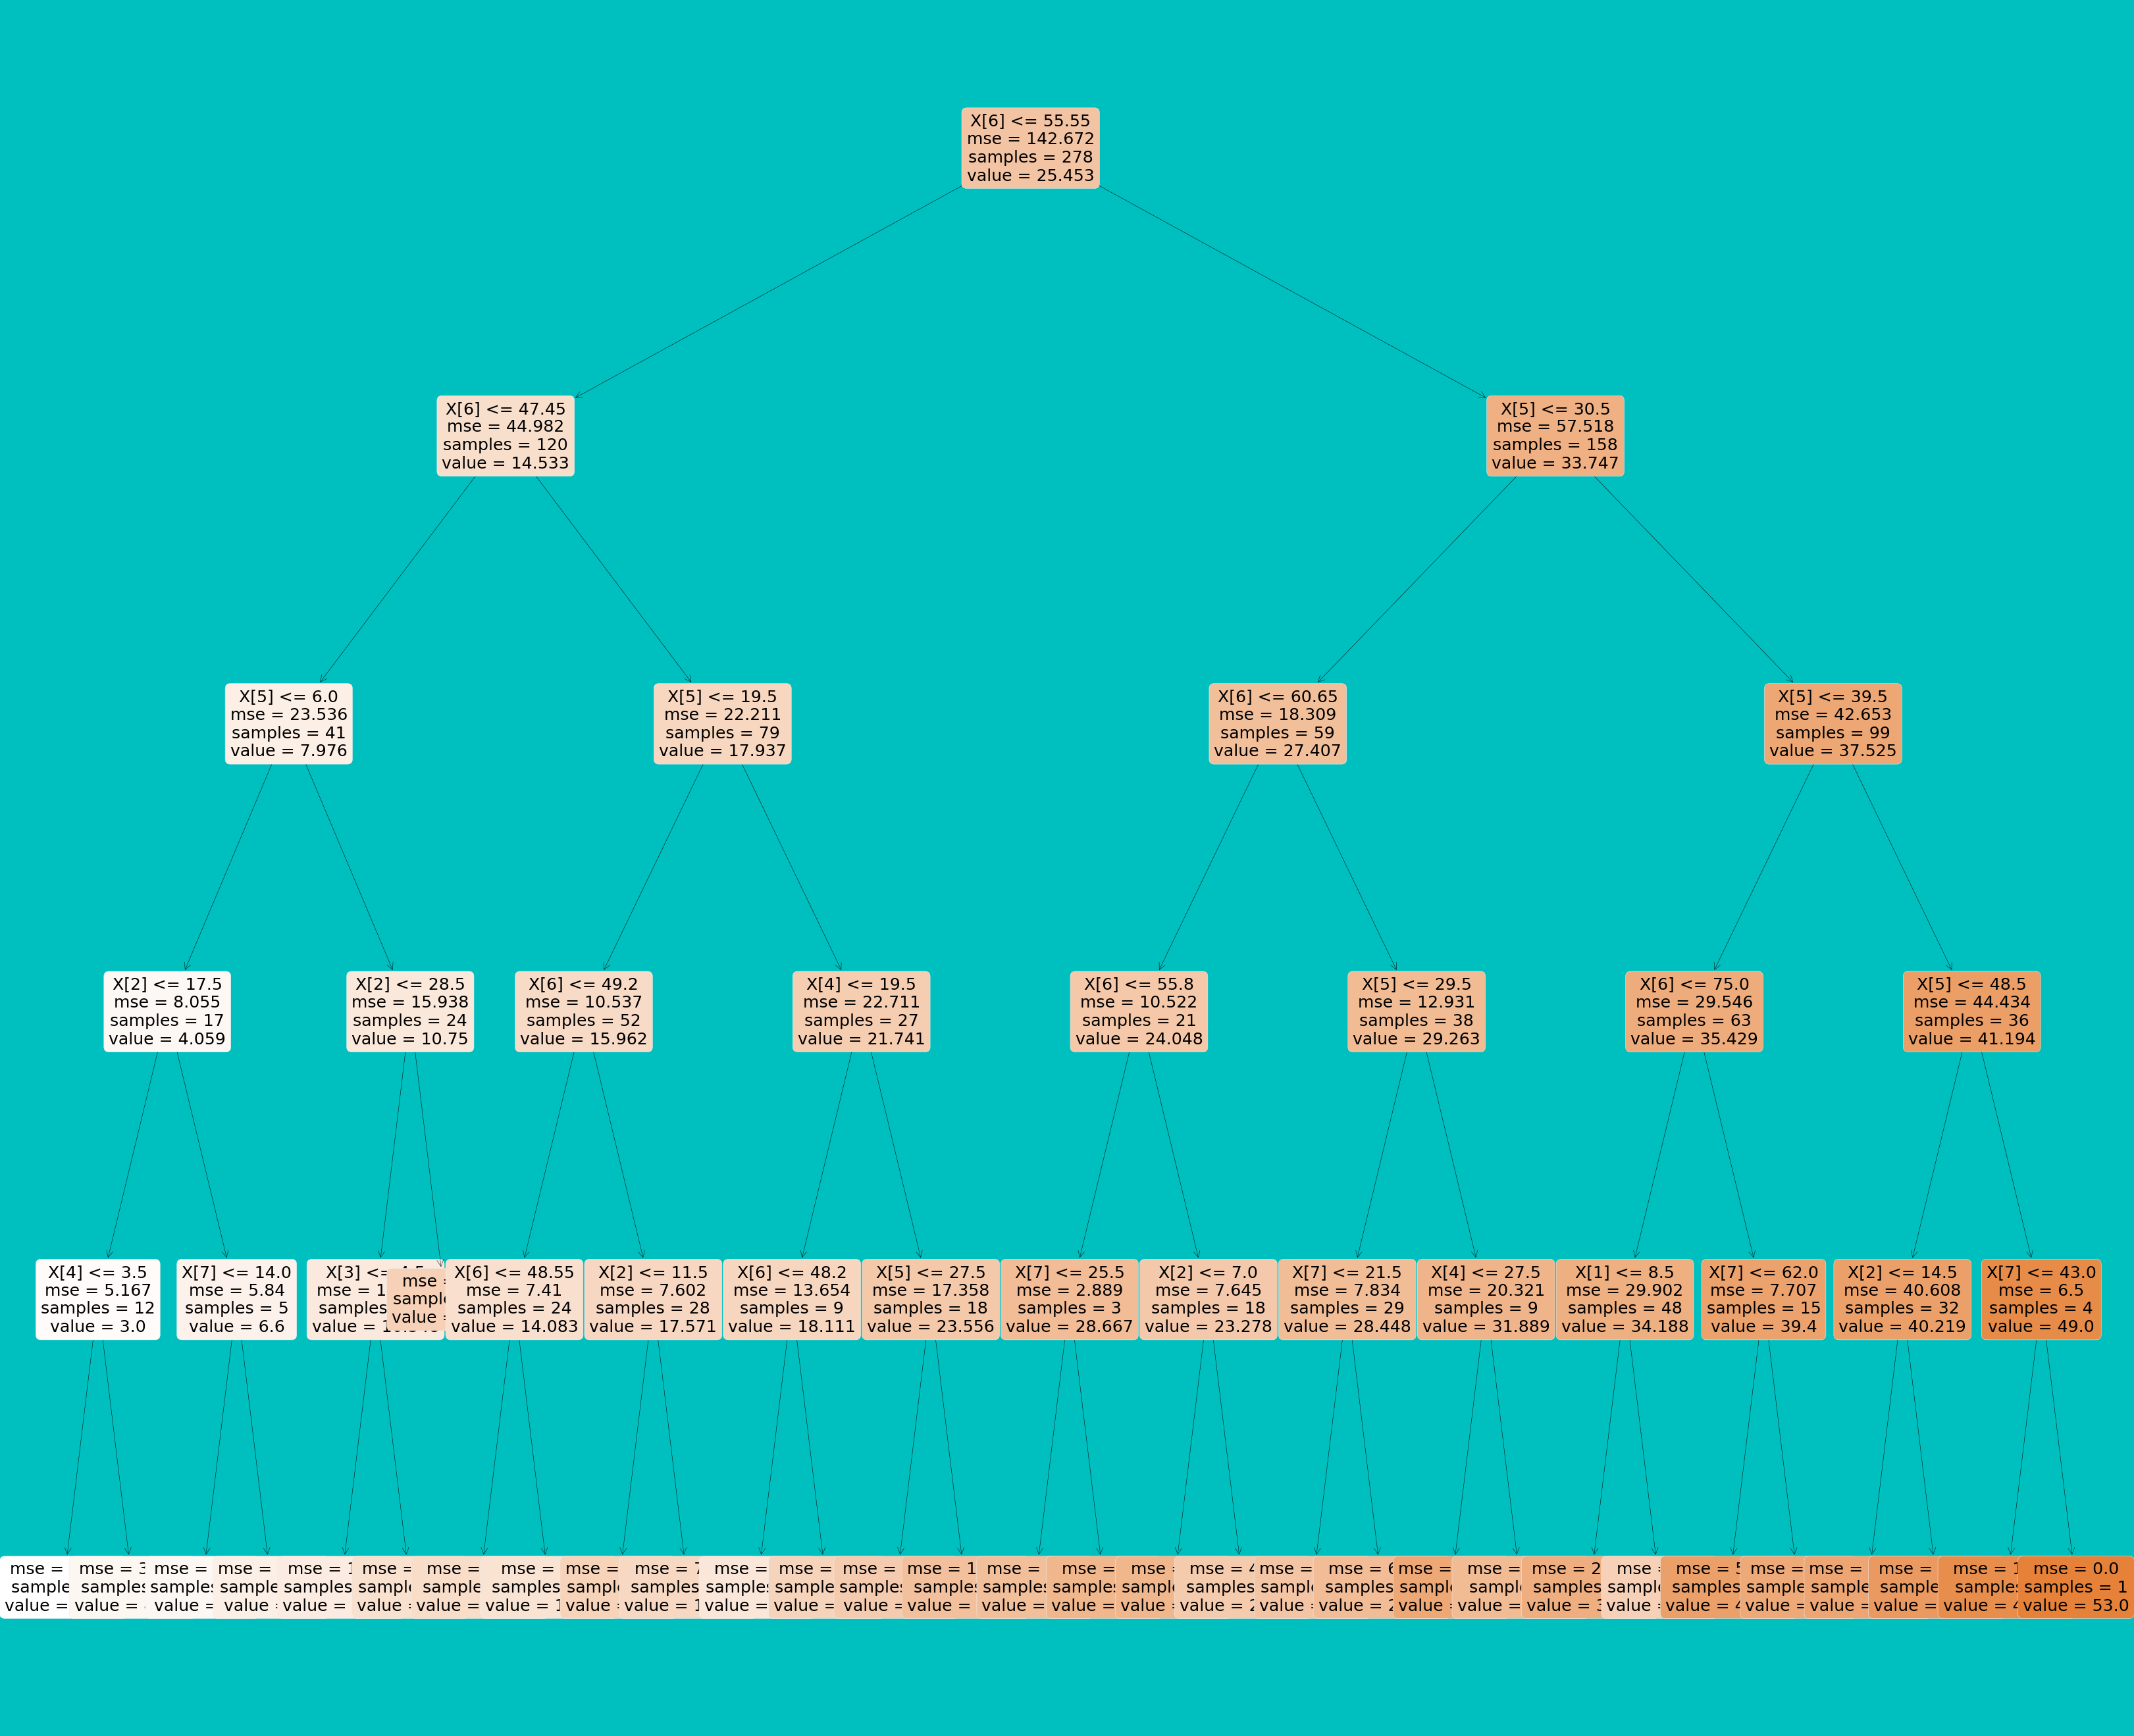

In [49]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(50.5, 45), facecolor = "c")
tree.plot_tree(model_decision_tree, 
               ax = ax, 
               fontsize = 25.18, 
               rounded = True, 
               filled = True, 
               class_names = ["Temperatura", "Co2"])
plt.show()

In [50]:
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. 
# É um valor entra 0 e 1.

print('R² = {}'.format(model_decision_tree.score(x_train, y_train).round(2)))

R² = 0.91


In [51]:
# Previsão do modelo

pred_2 = model_decision_tree.predict(x_train)
pred_2 = y_train - pred_2
pred_2

263   -1.846154
238    2.510638
302   -4.045455
21     4.615385
135   -7.489362
         ...   
323    1.666667
192   -0.454545
117    2.153846
47    -3.045455
172   -2.489362
Name: actual, Length: 278, dtype: float64

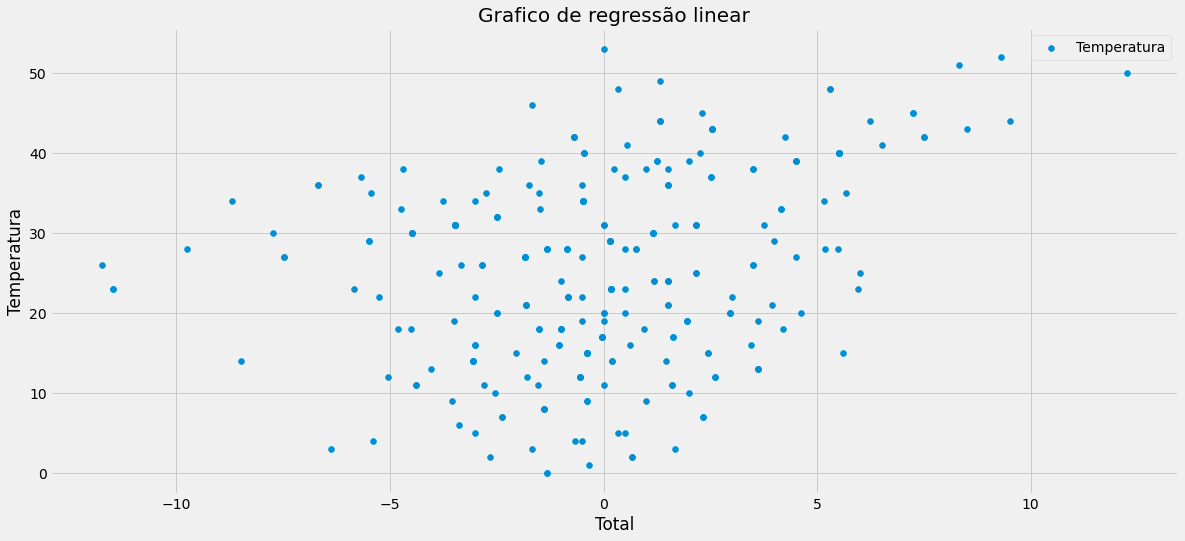

In [52]:
# Grafico de regressão linear

plt.figure(figsize=(18, 8))
plt.scatter(pred_2, y_train)
plt.title("Grafico de regressão linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Temperatura")
plt.legend(["Temperatura"])

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Internações', ylabel='Density'>

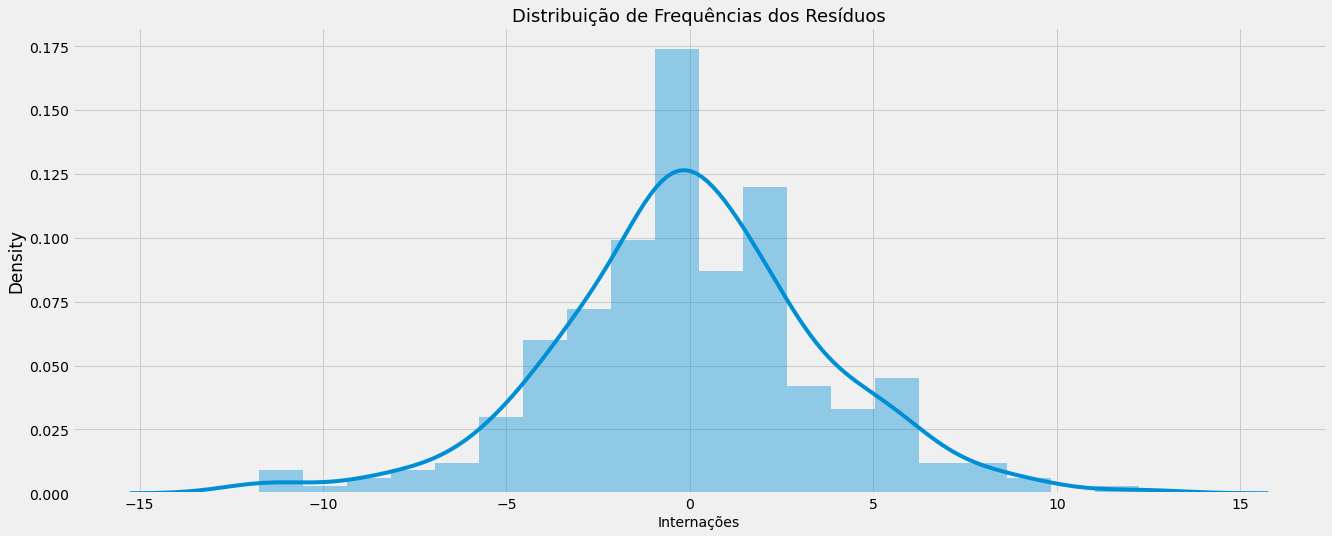

In [53]:
# Distribuição de Frequências dos Resíduos

ax = sns.distplot(pred_2)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Internações', fontsize=14)
ax

In [54]:
# Previsão valor Médio de AIH

prev_3 = x_test[0:25]
model_pred_3 = model_decision_tree.predict(prev_3)[0]
print("Previsão total:", model_pred_3)
prev_3

Previsão total: 9.38888888888889


,year,month,day,week,temp_2,temp_1,average,friend
6,0,0,6,4,7,14,46.2,9
52,0,1,23,6,14,23,50.8,17
269,0,9,12,4,25,29,60.6,28
45,0,1,16,6,18,19,50.0,17
294,0,10,7,5,24,26,52.7,20
189,0,6,10,1,34,37,75.3,42
191,0,6,12,6,37,40,75.6,27
116,0,3,28,0,24,27,61.2,20
90,0,3,2,3,34,26,56.3,35
249,0,8,22,0,31,30,68.3,32


# Resultados final dos modelos



In [55]:
# Exibindo um comparativo dos modelos de regressão linear

modelos = pd.DataFrame({
    
    "Modelos" :["Modelo Regressão Random Forest", 
                "Modelo Regressão Linear", 
                "Modelo Regressão Decision Tree"],

    "Acurácia" :[model_random_forest_score, 
                 model_linear_score_1, 
                 model_decision_tree_score]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Modelos,Acurácia
2,Modelo Regressão Decision Tree,0.908756
0,Modelo Regressão Random Forest,0.845144
1,Modelo Regressão Linear,0.844090


In [56]:
# Salvando modelo de regressão linear

import pickle

with open('model_random_forest_predict.pkl', 'wb') as file:
    pickle.dump(model_random_forest_predict, file)
    
with open('model_linear_pred.pkl', 'wb') as file:
    pickle.dump(model_linear_pred, file)
    
with open('model_decision_tree_pred.pkl', 'wb') as file:
    pickle.dump(model_decision_tree_pred, file)

# Conclusão do modelo machine learning

Pela análise dos modelos, modelo 1 Regressão Decision Tree teve melhor resultado que os demais, atigindo uma acurácia de 90.08% ou seja capaz de acertar as previsões de Co2, temperaturas 1, temperatura 2. De acordo com análise realizada.